<a href="https://colab.research.google.com/github/Khasnuwr/Brain-Tumor-Segmentation/blob/main/Brain_Tumor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cloning From GitHub Repository**

In [1]:
!git clone https://github.com/Khasnuwr/Brain-Tumor-Segmentation/

Cloning into 'Brain-Tumor-Segmentation'...
remote: Enumerating objects: 5906, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 5906 (delta 17), reused 16 (delta 7), pack-reused 5873
Receiving objects: 100% (5906/5906), 370.05 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (6271/6271), done.


#**Importing Keras and other Libraries and packages**

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

#**Listing The Dataset files**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/Brain-Tumor-Segmentation/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(4).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(23).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(88).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(60).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(52).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(51).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(13).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(71).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(96).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(61).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(87).jpg
/content/Brain-Tumor-Segmentation/dataset/Testing/meningioma_tumor/image(66).jpg
/content/Brain-Tumor-Segmenta

# **Label, Split and Train the Model**

In [5]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Brain-Tumor-Segmentation/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Brain-Tumor-Segmentation/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 24s 151ms/step - loss: 2.1573 - accuracy: 0.2966 - val_loss: 1.3613 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 8s 98ms/step - loss: 1.2145 - accuracy: 0.4563 - val_loss: 1.0448 - val_accuracy: 0.5272
Epoch 3/20
83/83 [==============================] - 8s 98ms/step - loss: 0.9940 - accuracy: 0.5664 - val_loss: 1.0175 - val_accuracy: 0.5136
Epoch 4/20
83/83 [==============================] - 8s 96ms/step - loss: 0.8521 - accuracy: 0.6334 - val_loss: 0.7878 - val_accuracy: 0.6531
Epoch 5/20
83/83 [==============================] - 8s 96ms/step - loss: 0.7763 - accuracy: 0.6750 - val_loss: 0.7774 - val_accuracy: 0.6599
Epoch 6/20
83/83 [==============================] - 8s 96ms/step - loss: 0.6891 - accuracy: 0.7151 - val_loss: 0.7075 - val_accuracy: 0.6735
Epoch 7/20
83/83 [==============================] - 8s 98ms/step - loss: 0.5940 - accuracy: 0.7590 - val_loss: 0.6324 - val_accuracy: 0.7007
Epoch 8/20


#**Confusion Matrix**

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predicting probabilities for each class for the test set
y_pred_probabilities = model.predict(X_test)

# Extracting the class with the highest probability as the predicted class
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Converting one-hot encoded labels back to categorical labels for the test set
y_test_categorical = np.argmax(y_test, axis=1)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test_categorical, y_pred)

11/11 [==============================] - 1s 81ms/step


In [14]:
conf_matrix

array([[84,  6,  3,  0],
       [21, 72,  1,  1],
       [ 4,  3, 45,  0],
       [ 1,  0,  0, 86]])

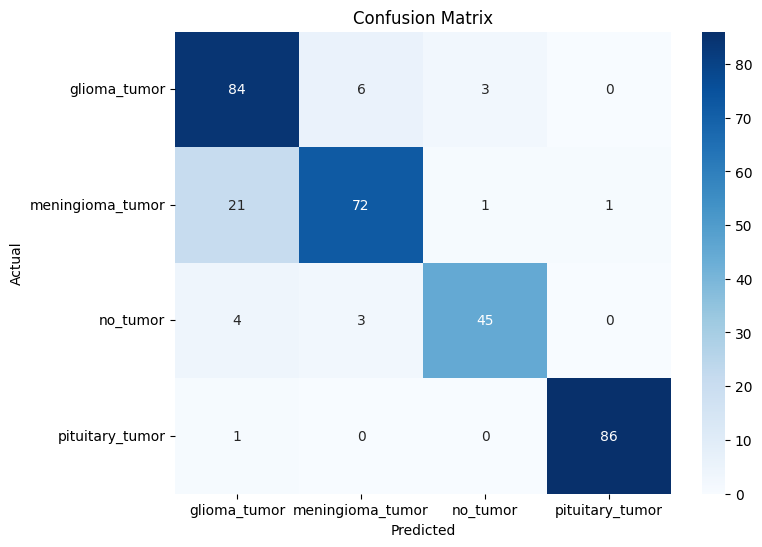

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define labels for better visualization
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Accuracy Graps**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

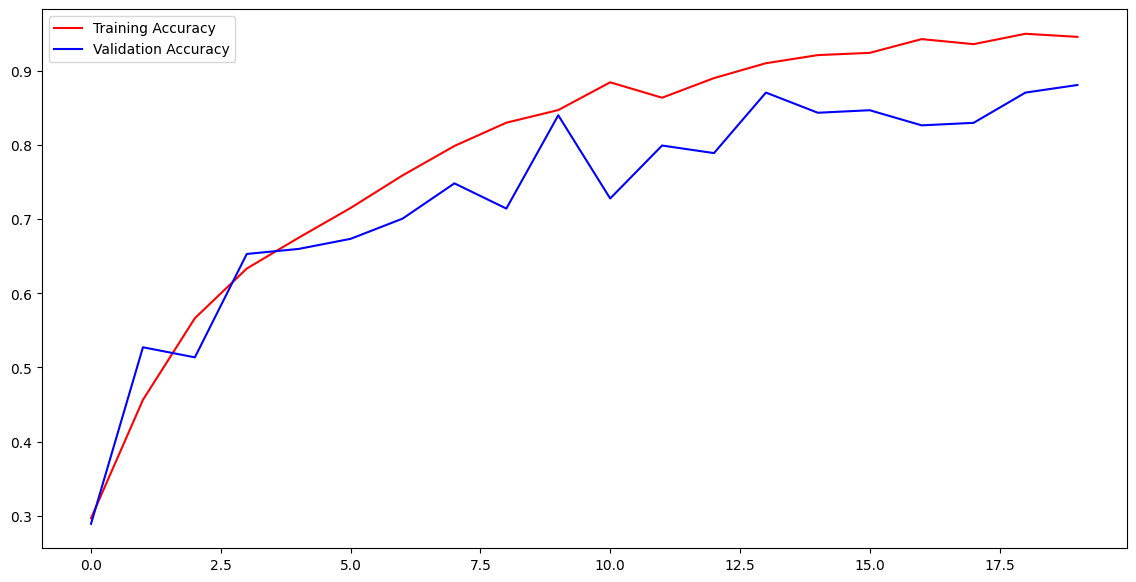

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

# **Loss Matrics**

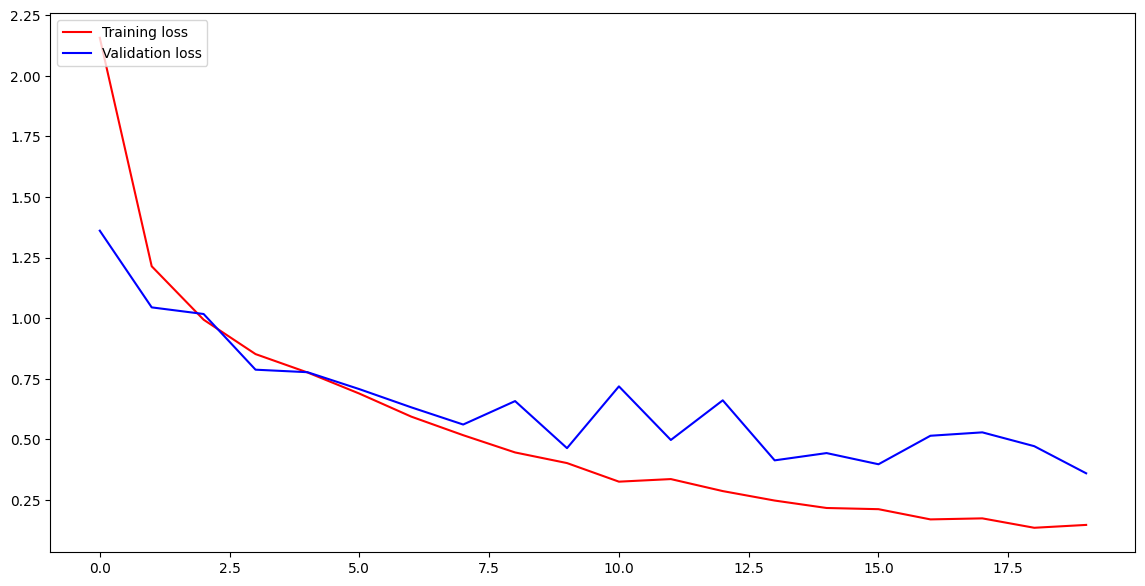

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

# **ROC Curve**

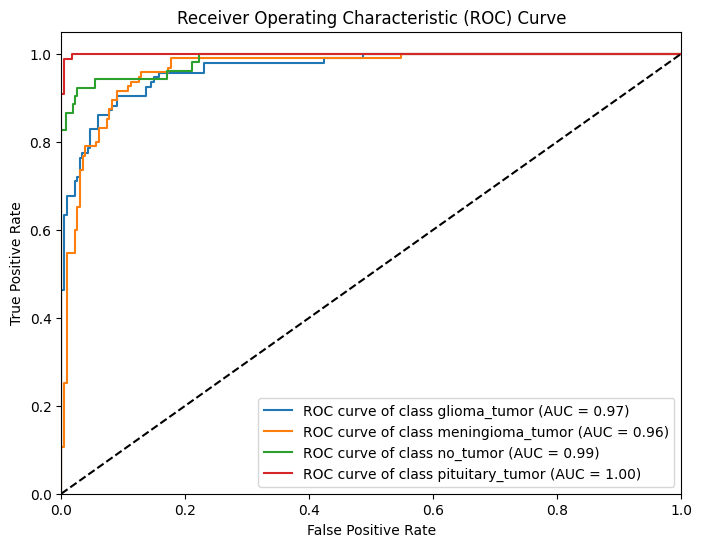

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculating the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {} (AUC = {:.2f})'.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# **Saving The Model**

In [30]:
model.save('/content/Brain-Tumor-Segmentation/Models/braintumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Reading and extracting the Image into image array and predict from the Trained Model**

In [25]:
PATH = '/content/Brain-Tumor-Segmentation/dataset/Testing/pituitary_tumor/image(94).jpg'

img = cv2.imread(PATH)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [26]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

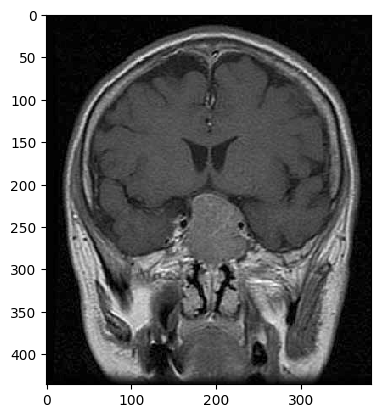

In [27]:
from tensorflow.keras.preprocessing import image
img = image.load_img(PATH)
plt.imshow(img,interpolation='nearest')
plt.show()

In [28]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 18ms/step


3

In [29]:
if indices == 0:
  print("Predicted Class is Glioma Tumor")

if indices == 1:
  print("Predicted Class is Meningioma Tumor")

if indices == 2:
  print("Predicted Class is No Tumor")

if indices == 3:
  print("Predicted Class is Pituitary Tumor")

Predicted Class is Pituitary Tumor


#**Predict from saved model**

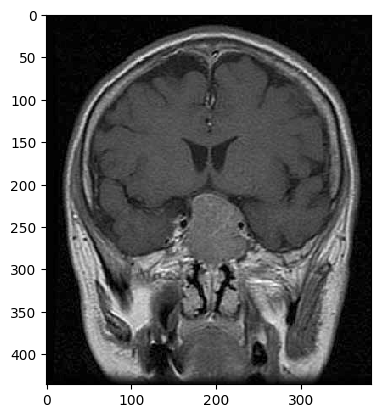

In [32]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

PATH = '/content/Brain-Tumor-Segmentation/dataset/Testing/pituitary_tumor/image(95).jpg'

img = image.load_img(PATH)
plt.imshow(img,interpolation='nearest')
plt.show()

In [33]:
# Resizing the image by 150x150
img = cv2.imread(PATH)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [34]:
# Reshaping it by (1,150,150,3)
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [35]:
from tensorflow.keras.models import load_model
saved_model = load_model('/content/Brain-Tumor-Segmentation/Models/braintumor.h5')

In [36]:
pre = saved_model.predict(img_array)
indices = pre.argmax()
indices

1/1 [==============================] - 0s 129ms/step


3

In [37]:
if indices == 0:
  print("Predicted Class is Glioma Tumor")

if indices == 1:
  print("Predicted Class is Meningioma Tumor")

if indices == 2:
  print("Predicted Class is No Tumor")

if indices == 3:
  print("Predicted Class is Pituitary Tumor")

Predicted Class is Pituitary Tumor
